In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv("all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.30,77860932152.00
1,Chile,2001,77.30,70979923960.00
2,Chile,2002,77.80,69736811435.00
3,Chile,2003,77.90,75643459840.00
4,Chile,2004,78.00,99210392858.00


### ====== Questions ======
1.	What do the trends look like?
2.	Which country has highest/lowest life expectancy and GDP?
3.	Which year has the highest/lowest life expectancy and GDP?
4.	Are there countries with low GDP but high life expectancy or vice versa?
5.	Are there outliers or unusual patterns?
6.	How do the differences between countries change over time?
7.	Is there a correlation between GDP and life expectancy?

# ============ INSPECTION AND STANDARDIZATION ============

In [74]:
# Inspecting null values and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


- 96 rows, 4 columns. No missing values. Datatypes are in correct format. 

In [75]:
# Standardizing column titles
df.columns = [column.lower().replace(' ', '_') for column in df.columns]

In [76]:
# Checking for duplicates
df.duplicated().sum()

np.int64(0)

- No duplicates.

# ============ DATA VISUALIZATION ============

## ====== Year vs Life Expectancy ======

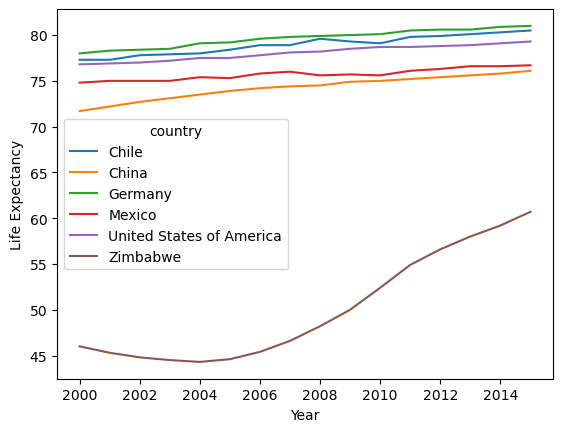

<Figure size 640x480 with 0 Axes>

In [77]:
sns.lineplot(x='year', y='life_expectancy_at_birth_(years)', hue='country', data=df)
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()
plt.clf()

- All countries except Zimbabwe has an overall upward trend of life expectancy. Zimbabwe has been observed to have a decline until 2004, and has rapid improvement afterwards. 

In [78]:
df.groupby('country')['life_expectancy_at_birth_(years)'].mean()

country
Chile                      78.94
China                      74.26
Germany                    79.66
Mexico                     75.72
United States of America   78.06
Zimbabwe                   50.09
Name: life_expectancy_at_birth_(years), dtype: float64

- Germany has the highest average life expectancy, while Zimbabwe has the lowest average.

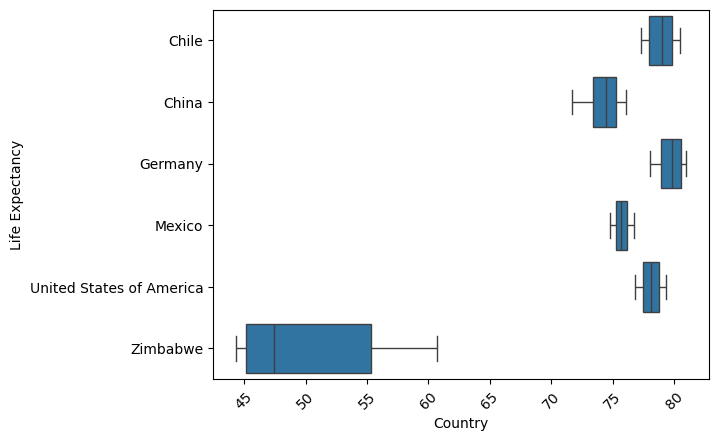

<Figure size 640x480 with 0 Axes>

In [79]:
# Boxplot Country vs Life Expectancy
sns.boxplot(x='life_expectancy_at_birth_(years)', y='country', data=df)
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Life Expectancy')
plt.show()
plt.clf()

- No outliers can be observed from the data.
- Zimbabwe shows right-skewed distribution, based on median less than mean, and longer right whisker.
- China shows left-skewed distribution, based on longer left whisker.
- Chile, Germany, Mexico, and USA has a thin box plot. The data has low variability, meaning most data points are close to the median.
- A skewed distribution means the data is asymmetrical, where the data has more values in one side, which affects the mean and makes it different than the median.

## ====== Year vs GDP ======

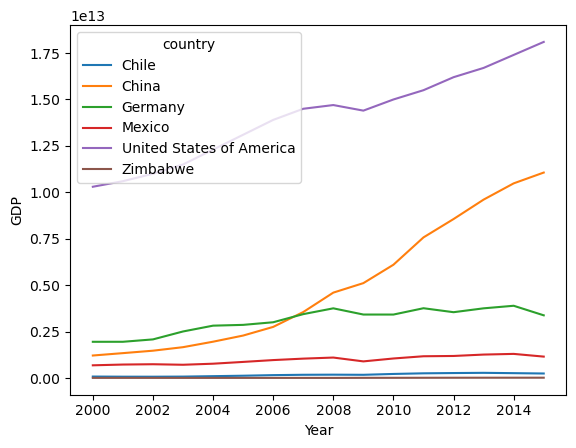

<Figure size 640x480 with 0 Axes>

In [80]:
sns.lineplot(x='year', y='gdp', hue='country', data=df)
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()
plt.clf()

- Zimbabwe maintains a stable GDP throughout the years. China's GDP quadrupled, and USA's almost doubled, within the span of 15 years.
- Mexico's GDP fluctuates slightly, but remains overall stable.
- Germany shows some fluctuations, but an overall upward trend.
- Chile shows a slight upward trend.

In [39]:
df.groupby('country')['gdp'].mean()

country
Chile                        169788845015.31
China                       4957713750000.00
Germany                     3094775625000.00
Mexico                       976650625000.00
United States of America   14075000000000.00
Zimbabwe                       9062579595.06
Name: gdp, dtype: float64

- By average, USA has highest GDP, followed by China, Germany, Mexico, Chile, and Zimbabwe.

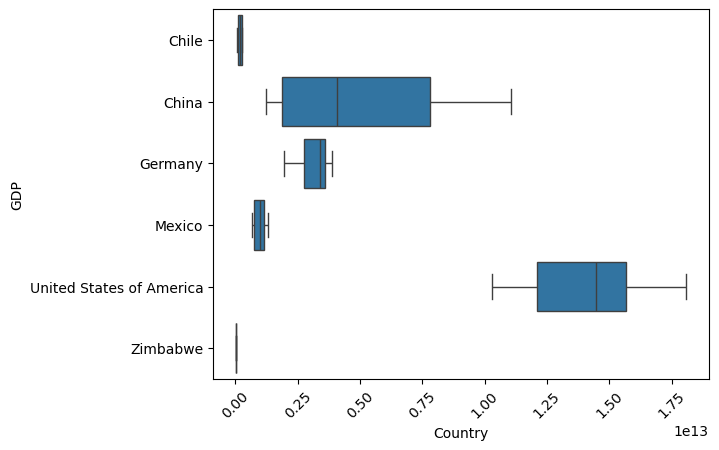

<Figure size 640x480 with 0 Axes>

In [81]:
# Boxplot Country vs GDP
sns.boxplot(x='gdp', y='country', data=df)
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('GDP')
plt.show()
plt.clf()

- No outliers observed from the data.
- China shows right-skewed distribution, shown by median less than mean, and longer right whisker. 
- Germany shows left-skewed distribution, shown by median more than mean, and longer left whisker.
- USA shows left-skewed distribution, shown by median more than mean.
- Zimbabwe, Chile, and Mexico has thin boxplot. The data has low variability, data points are close to median.

## ====== Life Expectancy vs GDP ======

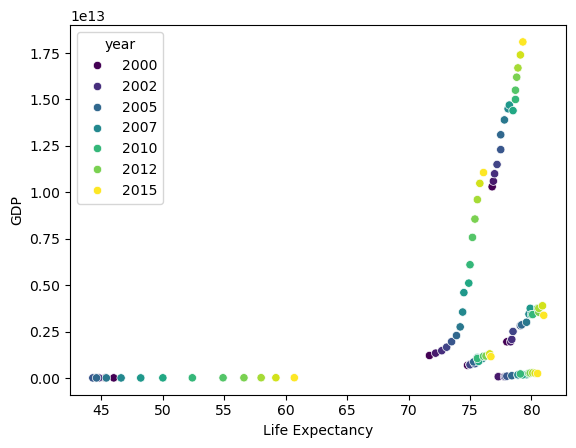

<Figure size 640x480 with 0 Axes>

In [82]:
# Scatterplot Life Expectancy vs GDP based on year
sns.scatterplot(x='life_expectancy_at_birth_(years)', y='gdp', hue='year', palette='viridis', data=df)
plt.xlabel('Life Expectancy')
plt.ylabel('GDP')
plt.show()
plt.clf()

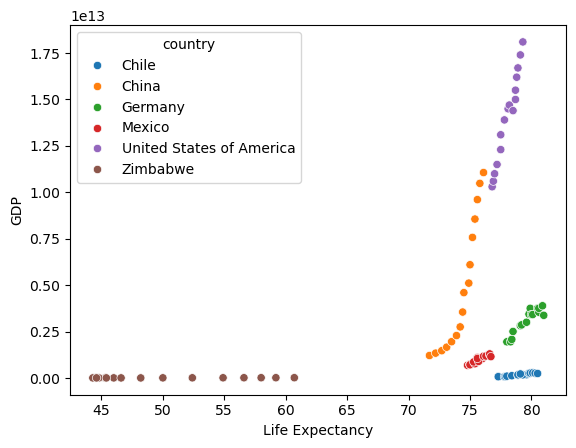

<Figure size 640x480 with 0 Axes>

In [83]:
# Scatterplot Life Expectancy vs GDP based on country
sns.scatterplot(x='life_expectancy_at_birth_(years)', y='gdp', hue='country', data=df)
plt.xlabel('Life Expectancy')
plt.ylabel('GDP')
plt.show()
plt.clf()

- As GDP increases, life expectancy also increases. In Zimbabwe, life expectancy increases even though GDP is stable. 